This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [8]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report

# Load and preprocess the IMDb dataset
def load_and_preprocess_data(num_words=20000, maxlen=200):
    # Load the data
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

    # Pad sequences to ensure consistent input size
    x_train = pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
    x_test = pad_sequences(x_test, maxlen=maxlen,padding='post',truncating='post')

    return (x_train, y_train), (x_test, y_test)



In [11]:
# Build a neural network model for sentiment classification
def build_model(vocab_size, embedding_dim, input_length):
    model = Sequential()

    # Add an embedding layer
    '''Sparsity to Density: An embedding layer transforms high-dimensional, sparse representations (like one-hot encoded vectors) into lower-dimensional,
    dense vectors.
    For example, instead of representing each word as a huge sparse vector (where most elements are zero),
    it converts words into dense vectors where each element captures some aspect of the word's meaning.'''
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
    # Flatten the output of the embedding layer
    model.add(Flatten())

    # Add a dense hidden layer
    model.add(Dense(64, activation='relu'))

    # Add the output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model


In [12]:
# Define parameters
vocab_size = 20000  # Number of unique tokens in the vocabulary
embedding_dim = 50  # Dimensionality of the embedding vectors
maxlen = 150        # Maximum length of input sequences

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data(num_words=vocab_size, maxlen=maxlen)


In [13]:
x_train

array([[   1,   14,   22, ...,   71,   43,  530],
       [   1,  194, 1153, ..., 9837,  131,  152],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ..., 1119, 1574,    7],
       [   1, 1446, 7079, ...,   12,    9,   23],
       [   1,   17,    6, ..., 1739,   22,    4]], dtype=int32)

In [14]:
# Build the model
model = build_model(vocab_size, embedding_dim, maxlen)

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6606 - loss: 0.5696 - val_accuracy: 0.8362 - val_loss: 0.3749
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9657 - loss: 0.1052 - val_accuracy: 0.8146 - val_loss: 0.5172
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9975 - loss: 0.0124 - val_accuracy: 0.8252 - val_loss: 0.6230
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 1.0000 - loss: 9.3722e-04 - val_accuracy: 0.8304 - val_loss: 0.6577
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 1.0000 - loss: 3.2184e-04 - val_accuracy: 0.8312 - val_loss: 0.6825


In [15]:

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Predict sentiment
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8106 - loss: 0.7433
Test Loss: 0.7473
Test Accuracy: 0.8101
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81     12500
    Positive       0.81      0.81      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



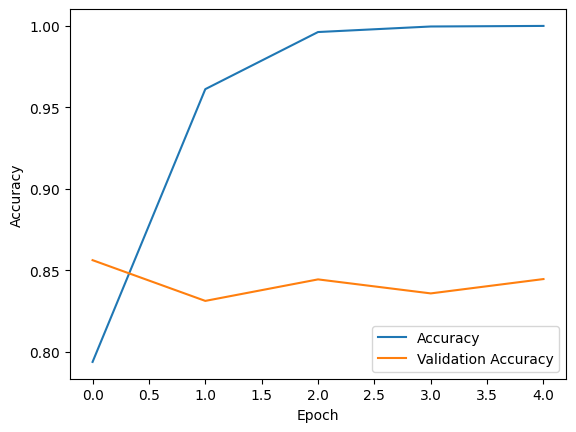

In [7]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()